In [42]:
from __future__ import division
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [239]:
df_010 = pd.read_csv('C:/workspace/World_Trade_via_Network/Rawdata/2001.csv') #load edge data
df_020 = pd.read_csv('C:/workspace/World_Trade_via_Network/Rawdata/2002.csv') #load edge data
df_030 = pd.read_csv('C:/workspace/World_Trade_via_Network/Rawdata/2003.csv') #load edge data
df_040 = pd.read_csv('C:/workspace/World_Trade_via_Network/Rawdata/2004.csv') #load edge data
df_050 = pd.read_csv('C:/workspace/World_Trade_via_Network/Rawdata/2005.csv') #load edge data
df_060 = pd.read_csv('C:/workspace/World_Trade_via_Network/Rawdata/2006.csv') #load edge data
df_070 = pd.read_csv('C:/workspace/World_Trade_via_Network/Rawdata/2007.csv') #load edge data
df_080 = pd.read_csv('C:/workspace/World_Trade_via_Network/Rawdata/2008.csv') #load edge data
df_090 = pd.read_csv('C:/workspace/World_Trade_via_Network/Rawdata/2009.csv') #load edge data
df_100 = pd.read_csv('C:/workspace/World_Trade_via_Network/Rawdata/2010.csv') #load edge data
df_110 = pd.read_csv('C:/workspace/World_Trade_via_Network/Rawdata/2011.csv') #load edge data
df_120 = pd.read_csv('C:/workspace/World_Trade_via_Network/Rawdata/2012.csv') #load edge data
df_130 = pd.read_csv('C:/workspace/World_Trade_via_Network/Rawdata/2013.csv') #load edge data
df_140 = pd.read_csv('C:/workspace/World_Trade_via_Network/Rawdata/2014.csv') #load edge data
df_150 = pd.read_csv('C:/workspace/World_Trade_via_Network/Rawdata/2015.csv') #load edge data
df_160 = pd.read_csv('C:/workspace/World_Trade_via_Network/Rawdata/2016.csv') #load edge data
df_160_CHN = pd.read_csv('C:/workspace/World_Trade_via_Network/Rawdata/2016_china.csv') #load edge data
df_160_USA = pd.read_csv('C:/workspace/World_Trade_via_Network/Rawdata/2016_US.csv') #load edge dat

In [245]:
# Generate DiGraph add nodes, edges and its attributes row by row
input_df = df_160_CHN

G = nx.DiGraph()
for r in range(len(input_df.index)) :
    rep = input_df.loc[r]['Reporter']
    par = input_df.loc[r]['Partner']
    
# add nodes
    if rep == par :
        continue
    else :
        if rep not in G:
            G.add_node(rep, trade_vol = 0)
        if par not in G:
            G.add_node(par, trade_vol = 0)
    
# add edges, edge weight
    if input_df.loc[r]['Trade Flow'] == 1 :
        if G.has_edge(rep, par) : 
            G[rep][par]['flow'] = (G[rep][par]['flow'] + input_df.loc[r]['Trade Value (US$)']) / 2
        else : 
            G.add_edge(rep, par, flow = input_df.loc[r]['Trade Value (US$)'])
    elif input_df.loc[r]['Trade Flow'] == 2 :
        if G.has_edge(par, rep) : 
            G[par][rep]['flow'] = (G[par][rep]['flow'] + input_df.loc[r]['Trade Value (US$)']) / 2
        else : 
            G.add_edge(par, rep, flow = input_df.loc[r]['Trade Value (US$)']) 
    else :
        print ("Row # = ", r)
        print ("TradeFlowValueError")
        break
    
# add node weight
# for n in G.nodes() :
#    print(n, G.node[n]['trade_vol'])
#    print(n)
#    print(G.node['China']['trade_vol'])
#    for e in edge_list_per_node:
#        G.node[n]['trade_vol'] += G[e[0]][e[1]]['flow']
            
# adj_mat = nx.to_numpy_matrix(G, nodelist=G.nodes())
# adj_mat

In [247]:
for n in G.nodes() :
    edge_list_per_node = list(set().union(G.in_edges(n), G.out_edges(n)))
    for e in edge_list_per_node:
        print (e[0], e[1], G[e[0]][e[1]]['flow'])

United Arab Emirates China 104731477815.0
China Germany 85729732884.5
Brazil China 21501874037.5
China Japan 130000000000.0
China Brazil 40494318555.0
Netherlands China 44854447143.5
China Australia 65443881146.0
China USA 98550000000.0
Saudi Arabia China 17283659892.0
China Rep. of Korea 141500000000.0
China United Arab Emirates 6828555703.0
China Turkey 2556729328.0
China Indonesia 19099810697.5
Indonesia China 29918949314.5
Russian Federation China 35808936417.5
United Kingdom China 54641185461.5
Canada China 35544877244.0
Rep. of Korea China 85994060594.0
China France 20108370308.5
Australia China 38549708016.0
China Mexico 7867990350.0
Turkey China 19791965019.5
USA China 337500000000.0
China Spain 5853205580.0
Italy China 26767612639.0
India China 56416276776.0
China Italy 14485907641.5
Mexico China 47462626564.5
China Netherlands 10164922422.0
France China 35443977747.0
Japan China 7914500000000.0
Germany China 80007015323.5
China Russian Federation 30140698859.0
China India 103

Turkey Rep. of Korea 5884626305.5
Rep. of Korea Saudi Arabia 8219555027.5
Rep. of Korea Japan 46850756872.0
Mexico Italy 4695281318.0
France Mexico 2321813463.5
Mexico Turkey 587126400.0
Spain Mexico 3474560613.5
Mexico Canada 7696564082.5
India Mexico 2285137964.5
Mexico India 3830625087.5
Japan Mexico 4760443972.5
Mexico Japan 14207086142.5
Brazil Mexico 3292007952.0
Mexico Germany 13211644891.0
Mexico USA 205000000000.0
Rep. of Korea Mexico 3101256150.5
Mexico United Arab Emirates 132056558.5
USA Mexico 300000000000.0
Mexico Netherlands 2028356182.0
Germany Mexico 4950302841.5
Mexico Indonesia 1066921466.0
United Arab Emirates Mexico 514757538.0
Russian Federation Mexico 411466692.5
Mexico Russian Federation 1181598018.5
China Mexico 7867990350.0
Italy Mexico 1201282894.5
Turkey Mexico 529778497.0
Saudi Arabia Mexico 475956743.5
Mexico United Kingdom 1919212194.0
Mexico Saudi Arabia 103520996.0
Mexico China 47462626564.5
Australia Mexico 1351384449.5
Mexico Australia 436725753.5
Mex

United Kingdom United Arab Emirates 2038955586.0
Italy United Kingdom 12646063793.5
Mexico United Kingdom 1919212194.0
United Kingdom Rep. of Korea 6436107616.0
France United Kingdom 23998999556.5
United Kingdom Indonesia 1693149501.0
United Kingdom Japan 13327696551.0
Germany United Kingdom 41609095226.0
Indonesia United Kingdom 805340404.0
United Kingdom Mexico 2883769416.5
Spain United Kingdom 12705662450.0
China United Kingdom 18411863383.5
USA India 44866366066.0
United Kingdom USA 56191742782.5
India USA 21023754492.0
USA United Kingdom 58360898523.0
China USA 98550000000.0
USA Turkey 7564633583.0
USA Japan 133000000000.0
USA Indonesia 18154494859.0
Australia USA 21925586997.0
USA Russian Federation 12354990482.5
Japan USA 66227931655.5
Turkey USA 10127874117.0
USA Australia 9160329183.0
USA Rep. of Korea 69314722452.5
Italy USA 16051917622.0
USA United Arab Emirates 3507697242.0
USA France 41948308261.5
United Arab Emirates USA 21493265488.5
Mexico USA 205000000000.0
Brazil USA 

In [248]:
pr = nx.pagerank(G, alpha=0.85, weight='flow')
sorted_pr = sorted(pr.items(), key=lambda kv: kv[1])
sorted_pr

[('United Arab Emirates', 0.014191599683733656),
 ('Saudi Arabia', 0.01629935820894335),
 ('Turkey', 0.016932237419865003),
 ('Indonesia', 0.01936578825213664),
 ('India', 0.02334083334858429),
 ('Brazil', 0.02508148917435097),
 ('Spain', 0.029063074281161557),
 ('Australia', 0.029278011478264927),
 ('Russian Federation', 0.029882472535159302),
 ('Mexico', 0.03577272269881522),
 ('Canada', 0.03710207452405116),
 ('United Kingdom', 0.03821272130051923),
 ('Netherlands', 0.042432466096977574),
 ('Italy', 0.04249726980212643),
 ('France', 0.049286742764761256),
 ('Rep. of Korea', 0.057185136226798834),
 ('Japan', 0.07420893010138338),
 ('Germany', 0.10131411405683585),
 ('USA', 0.12582131315821804),
 ('China', 0.19273164488731334)]

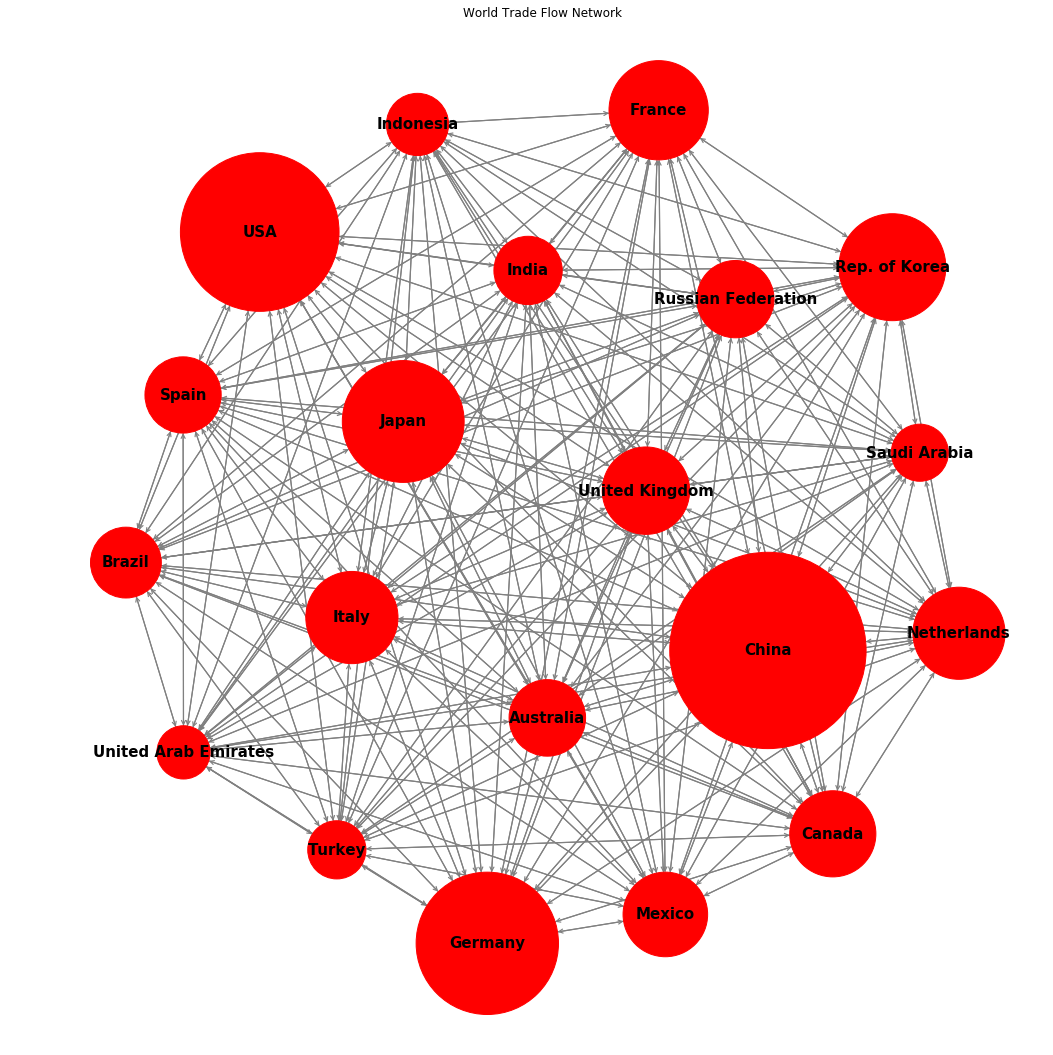

<Figure size 432x288 with 0 Axes>

In [249]:
# Plot DiGraph
trade_tpls_list = list(G.edges())
for tpl in trade_tpls_list : 
    edge_width_list = G[tpl[0]][tpl[1]]['flow']/50000000000
    
pos = nx.spring_layout(G)
plt.figure(figsize=(14, 14))
nx.draw(G, pos=pos,
        with_labels=True,
        font_weight='bold',
        font_size = 15,
        node_size = [d*200000 for d in pr.values()],
        arrowstyle='->',
        arrowsize=10,
        edge_color = 'grey',
        width = edge_width_list)
plt.title('World Trade Flow Network');
plt.show()
plt.savefig('World_Trade_Flow_Network_type1.png', format="PNG") # Save figure

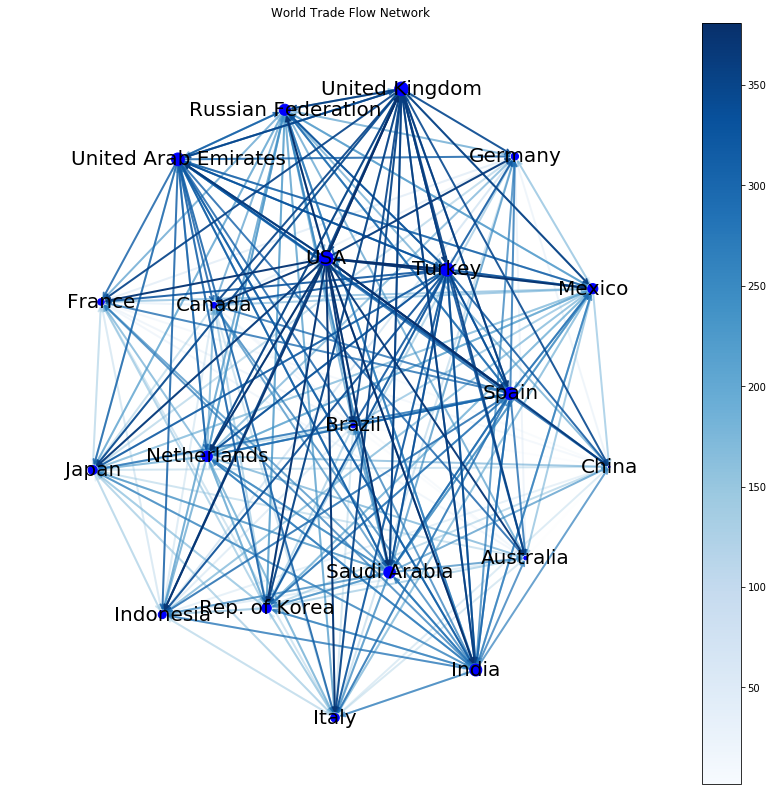

<Figure size 432x288 with 0 Axes>

In [250]:
pos = nx.layout.spring_layout(G)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
lab = {}
for n in G.nodes():
    lab[n] = n

plt.figure(figsize=(14, 14))
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=2)
nx.draw_networkx_labels(G,pos,lab,font_size=20)

# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.title('World Trade Flow Network');
plt.show()
plt.savefig('World_Trade_Flow_Network_type2.pdf', format="pdf") # Save figure

2001    0.0165678
2002    0.0176765
2003    0.0181742
2004    0.0195891
2005     0.021303
2006    0.0219669
2007    0.0225876
2008    0.0236983
2009    0.0245665
2010    0.0264229
2011    0.0286951
2012    0.0263244
2013     0.026886
2014    0.0260579
2015    0.0246836
2016    0.0260351
Name: 5, dtype: object


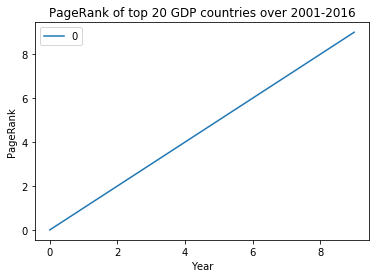

In [51]:
time_series_df = pd.read_csv('C:/Users/swjj0_000/Desktop/raw_data/pagerank_time_series.csv') #load edge data
yr_list = list(time_series_df.columns)
yr_list.remove('Unnamed: 0')

# for r in range(len(time_series_df.index)) :
#     dat_dict = {k:v for k, v in zip(time_series_df.loc[r][0], list(time_series_df.loc[r][1:])}

print(time_series_df.loc[5][1:])
plt.plot(range(10))
plt.title('PageRank of top 20 GDP countries over 2001-2016')
plt.xlabel('Year')
plt.ylabel('PageRank')
plt.gca().legend(country_list)
pyplot.show()